In [52]:
import geopandas as gp
import pandas as pd
import pathlib
import numpy as np
from shapely.geometry import LineString, MultiLineString, Point
from shapely import ops
import libpysal
import random

# load data frames
import load_data_module

In [11]:
from sklearn.metrics.cluster import homogeneity_score, completeness_score
print(homogeneity_score([0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0 ]), 
      completeness_score([0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0]))

1.0 0.0


In [53]:
# Load preprocessed data
raw_full_trip_gdf, raw_trip_sp_gdf, raw_trip_ep_gdf = load_data_module.raw_full_trip_gdf, load_data_module.raw_trip_sp_gdf, load_data_module.raw_trip_ep_gdf

raw_full_trip_gdf.head(3)

,PERSON_ID,TRIP_ID,TRIP_START,TRIP_END,TRIP_LEN_IN_MTRS,TRIP_DURATION_IN_SECS,geometry,TRIP_WD,TRIP_DATE,hl
TRIP_START,,,,,,,,,,
2022-10-31 09:15:57,16348,985222,2022-10-31 09:15:57,2022-10-31 09:34:08,2574,1090,"LINESTRING (13.50497 52.45445, 13.50498 52.454...",Monday,2022-10-31,1
2022-10-31 11:04:22,16348,985223,2022-10-31 11:04:22,2022-10-31 11:09:12,353,290,"LINESTRING (13.52685 52.45699, 13.52685 52.457...",Monday,2022-10-31,0
2022-10-31 11:38:24,16348,985301,2022-10-31 11:38:24,2022-10-31 11:43:51,315,327,"LINESTRING (13.52438 52.45529, 13.52433 52.455...",Monday,2022-10-31,0


In [54]:
raw_full_trip_gdf.index=pd.to_datetime(raw_full_trip_gdf.TRIP_START)
raw_full_trip_gdf['hl'] = raw_full_trip_gdf['TRIP_START'].apply(lambda x: 1 if (x in raw_full_trip_gdf.between_time('6:00', '10:00').TRIP_START) or (x in raw_full_trip_gdf.between_time('16:00', '00:00').TRIP_END) else 0).astype(object)

<AxesSubplot: ylabel='Frequency'>

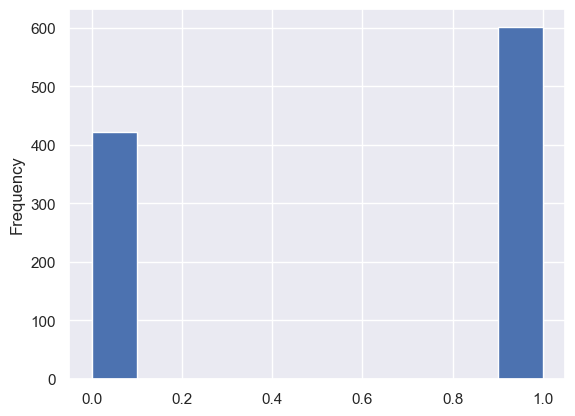

In [55]:
raw_full_trip_gdf.hl.plot.hist()

# Find Trips per User per Date over the two Weeks

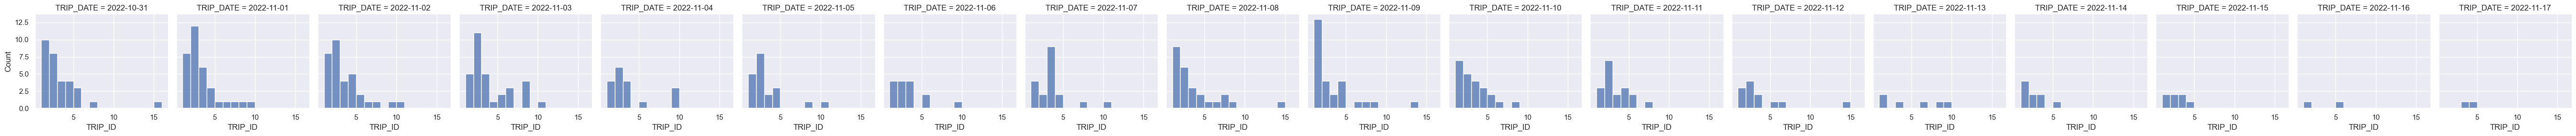

In [56]:
import seaborn as sns

sns.set_theme(style="darkgrid")
df = raw_full_trip_gdf.groupby(['TRIP_DATE', 'PERSON_ID']).count().reset_index()
sns.displot(
    df, x="TRIP_ID", col="TRIP_DATE",
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),
)

In [57]:
raw_full_trip_gdf.groupby(['TRIP_DATE', 'PERSON_ID']).count().reset_index()

,TRIP_DATE,PERSON_ID,TRIP_ID,TRIP_START,TRIP_END,TRIP_LEN_IN_MTRS,TRIP_DURATION_IN_SECS,geometry,TRIP_WD,hl
0,2022-10-31,16348,7,7,7,7,7,7,7,7
1,2022-10-31,16354,3,3,3,3,3,3,3,3
2,2022-10-31,16356,5,5,5,5,5,5,5,5
3,2022-10-31,16361,4,4,4,4,4,4,4,4
4,2022-10-31,16363,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...
329,2022-11-15,17264,1,1,1,1,1,1,1,1
330,2022-11-16,16356,5,5,5,5,5,5,5,5
331,2022-11-16,16656,1,1,1,1,1,1,1,1
332,2022-11-17,16356,4,4,4,4,4,4,4,4


In [58]:
se_trips = pd.concat([raw_trip_sp_gdf.rename(columns={'TRIP_SP': 'geometry'}), raw_trip_ep_gdf.rename(columns={'TRIP_EP': 'geometry'})]).astype({'TRIP_ID':'object', 'PERSON_ID':'object'}).sort_values('TRIP_ID')


se_trips[se_trips['PERSON_ID'].isin(random.sample(se_trips.PERSON_ID.to_list(), 10))].explore(column="PERSON_ID", marker_kwds=dict(radius=10, fill=True))

c:\Users\Bened\Documents\Git\Master-Thesis\env\lib\site-packages\geopandas\explore.py:362: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(gdf[column][~nan_idx], categories=categories)


In [65]:
raw_full_trip_gdf.query("TRIP_ID == 1011504").reset_index(drop=True).explore()

In [22]:
raw_full_trip_gdf[(raw_full_trip_gdf['PERSON_ID'].isin([16348, 17268, 17272]))].reset_index(drop=True).explore(column="PERSON_ID") #& (raw_full_trip_gdf['hl'] == 1)

In [ ]:
raw_trip_ep_gdf.groupby('PERSON_ID').count().TRIP_ID.plot.hist(bins=100)

In [ ]:
raw_trip_ep_gdf.groupby(['PERSON_ID', 'TRIP_DATE']).count().reset_index('TRIP_DATE').TRIP_ID.plot.hist(bins=30)